In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path = "/Users/ashpreetsingh/Downloads/survey lung cancer.csv"

In [3]:
df= pd.read_csv(path)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [14]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


<AxesSubplot:xlabel='GENDER', ylabel='count'>

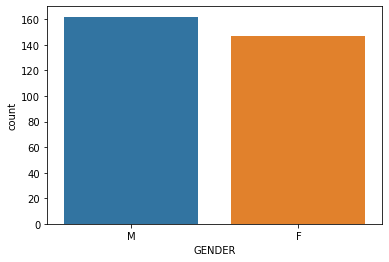

In [7]:
sns.countplot(x=df['GENDER'])

In [23]:
df['Male'] = pd.get_dummies(df['GENDER'])['M']

In [33]:
df['CANCER']= pd.get_dummies(df['LUNG_CANCER'])['YES']

In [36]:
df.drop(['GENDER','LUNG_CANCER'],axis=1,inplace=True)

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
sc = StandardScaler()

In [46]:
sc.fit(df[['AGE']])

StandardScaler()

In [48]:
df['AGE'] = sc.fit_transform(df[['AGE']])

<AxesSubplot:xlabel='Male', ylabel='CANCER'>

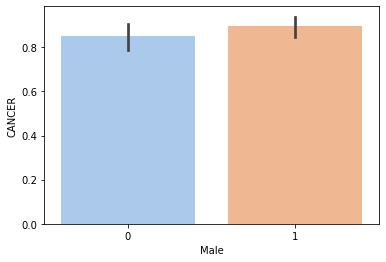

In [53]:
sns.barplot(x=df['Male'],y=df['CANCER'],palette='pastel')

In [ ]:
sns.barplot(x=df['Male'],y=df['CANCER'])

<AxesSubplot:>

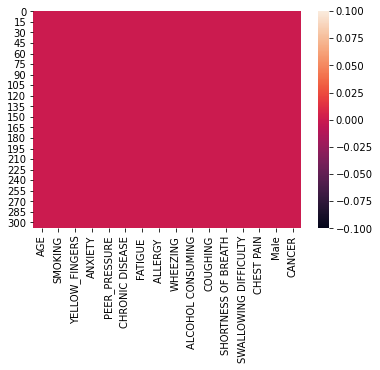

In [62]:
sns.heatmap(df.isna())

<AxesSubplot:xlabel='Male', ylabel='CHEST PAIN'>

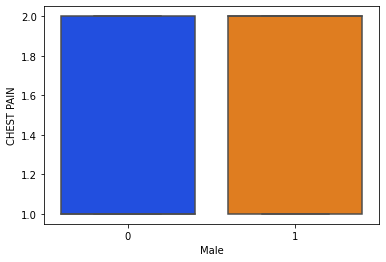

In [66]:
sns.boxplot(y=df['CHEST PAIN'],x=df['Male'],palette='bright')

<AxesSubplot:>

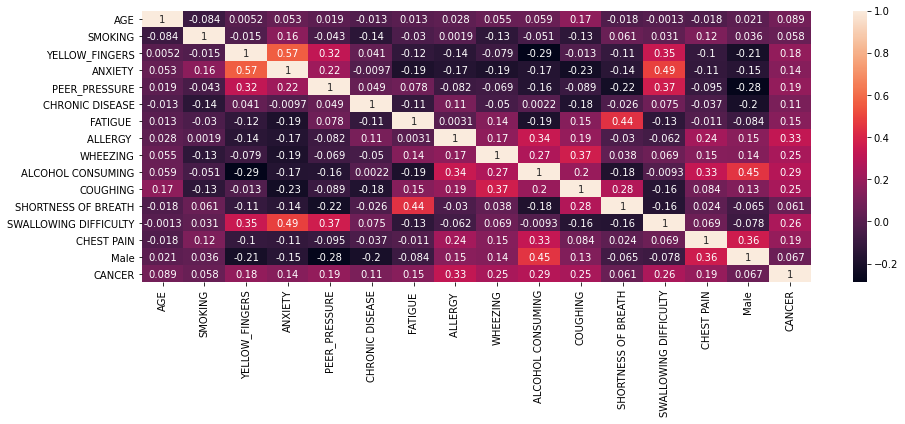

In [72]:
plt.figure(figsize=(15,5)) 
sns.heatmap(df.corr(),annot=True)

In [87]:
import tensorflow as tf
from tensorflow import keras

In [75]:
from sklearn.model_selection import train_test_split

In [82]:
X = df.drop('CANCER',axis=1)
y= df['CANCER']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [138]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
model = Sequential()
    
model.add(Dense(5, input_shape = (15,), activation = 'relu'))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))
    
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'] )
    
model.fit(X_train,y_train, epochs= 24, batch_size = 10)

Epoch 1/24
21/21 [==============================] - 1s 2ms/step - loss: 0.6222 - accuracy: 0.8116
Epoch 2/24
21/21 [==============================] - 0s 2ms/step - loss: 0.5572 - accuracy: 0.8454
Epoch 3/24
21/21 [==============================] - 0s 2ms/step - loss: 0.5031 - accuracy: 0.8454
Epoch 4/24
21/21 [==============================] - 0s 3ms/step - loss: 0.4550 - accuracy: 0.8454
Epoch 5/24
21/21 [==============================] - 0s 2ms/step - loss: 0.4242 - accuracy: 0.8454
Epoch 6/24
21/21 [==============================] - 0s 2ms/step - loss: 0.4102 - accuracy: 0.8454
Epoch 7/24
21/21 [==============================] - 0s 2ms/step - loss: 0.4028 - accuracy: 0.8454
Epoch 8/24
21/21 [==============================] - 0s 2ms/step - loss: 0.4024 - accuracy: 0.8454
Epoch 9/24
21/21 [==============================] - 0s 1ms/step - loss: 0.4003 - accuracy: 0.8454
Epoch 10/24
21/21 [==============================] - 0s 2ms/step - loss: 0.3997 - accuracy: 0.8454
Epoch 11/24
21/21 [

In [139]:
_,scores = model.evaluate(X_test,y_test, verbose = 0)
print(f'Model Accuracy : {round(scores*100)}%')

Model Accuracy : 93%
